In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

[]

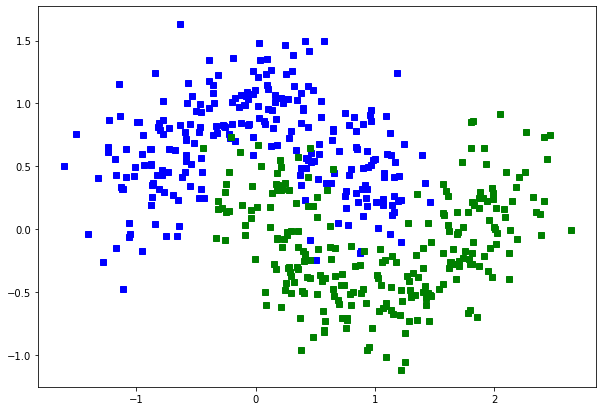

In [2]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

plt.figure(figsize=(10,7))
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bs')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'gs')
plt.plot()

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X, y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

[]

<Figure size 720x360 with 0 Axes>

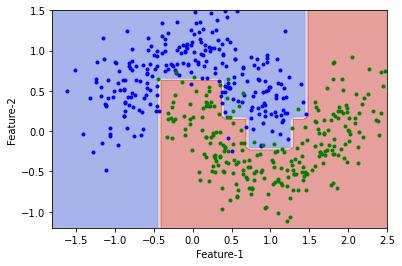

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(ada_clf, 
                                              X,
                                              response_method="predict",
                                              xlabel='Feature-1', ylabel='Feature-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.axis([-1.8,2.5,-1.2,1.5])
plt.plot()

## Stacking

In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

In [9]:
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', DecisionTreeClassifier(max_depth = 4, random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=10, max_depth=3, random_state=43),
)
stacking_clf.fit(X, y)

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf',
                                DecisionTreeClassifier(max_depth=4,
                                                       random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(max_depth=3,
                                                          n_estimators=10,
                                                          random_state=43))

[]

<Figure size 720x360 with 0 Axes>

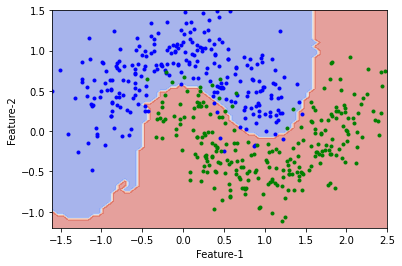

In [10]:
plt.figure(figsize=(10, 5))
disp = DecisionBoundaryDisplay.from_estimator(stacking_clf, 
                                              X,
                                              response_method="predict",
                                              xlabel='Feature-1', ylabel='Feature-2',
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b.')
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'g.')
plt.axis([-1.6,2.5,-1.2,1.5])
plt.plot()